# Pima Indians Diabetes Database Descriptive Statistics Project
## Predict the onset of diabetes based on diagnostic measures. This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether a patient has diabetes, based on certain diagnostic measurements included in the dataset.


### Columns of the dataset
### Pregnancies: Number of times pregnant
### Glucose: Plasma glucose concentration 2 hours in an oral glucose tolerance test
### Blood Pressure: Diastolic blood pressure (mm Hg)
### Skin Thickness: Triceps skin fold thickness (mm
### Insulin: 2-Hour serum insulin (mu U/ml)
### BMI: Body mass index (weight in kg/(height in m)^2) 
### Diabetes Pedigree Function: Diabetes pedigree function
### Age: Age (years)
### Outcome: Class variable (0 or 1) 0 mean non-diabetic and 1 means diabetic



In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns

##  *Importing the dataset.*

In [2]:
df_diabetes= pd.read_csv('diabetes.csv')
df_diabetes.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### Q1 Please do the basic exploration of data and explain missing values, number of rows and columns and data types in statistical term.

### Dimensions of the data-set

In [3]:
df_diabetes.shape

(768, 9)

data set contain 768 rows and 9 columns.

### Basic Information about the data-set

In [4]:
df_diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


‘Outcome’ is Categorical Data, which says if the patient is diabetic or not. It is Nominal data. 1 means the person is diabetic and 0 means a person is not. We can identify that out of the 768 persons, 500 are labeled as 0 (non-diabetic) and 268 as 1 (diabetic). Pregnencies is discrete data, All other features are continous data.

In [5]:
df_diabetes["Outcome"].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [6]:
df_diabetes.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [7]:
df_diabetes.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

We can observe that there are no data points missing in the data set. 

## Q2 Calculate appropriate measures of central tendency for Glucose and outcome column only?
### GLUCOSE IS CONTINOUS DATA so appropriate measure of central tendency could be MEAN or MEDIAN based on the distribution of data. OUTCOME is categorical data having counts of diabetic and non-diabetic patients so appropriate measure of central tendency for outcome will be MODE

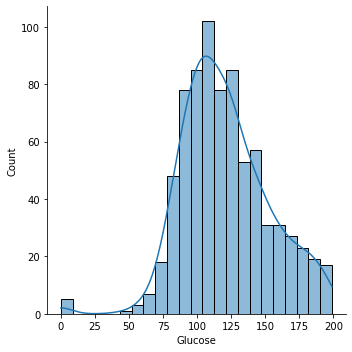

In [10]:
sns.displot(df_diabetes['Glucose'], kde=True);

### As seen in the graph of the distribution of 'Glucose', we have outliers on left side, so the data for 'Glucose' is Left Skewed. Appropiate measure of central tendency will be 'MEDIAN' for non symmetrical data

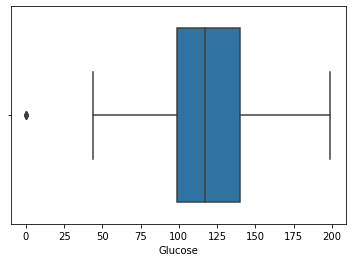

In [11]:
ax = sns.boxplot(x=df_diabetes["Glucose"])

In [12]:
print("MEDIAN of 'Glucose' Coloumn is:", df_diabetes['Glucose'].median())

MEDIAN of 'Glucose' Coloumn is: 117.0


In [13]:
df_diabetes['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

### MODE of 'Outcome' Coloumn is: 500

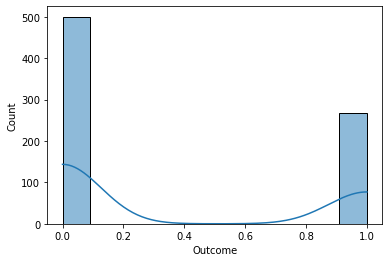

In [14]:
sns.histplot(data=df_diabetes, x="Outcome", kde=True);

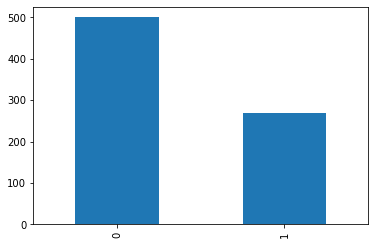

In [15]:
ax = df_diabetes['Outcome'].value_counts().plot.bar()

## Q3 Please provide 5 points data summaries for required columns?

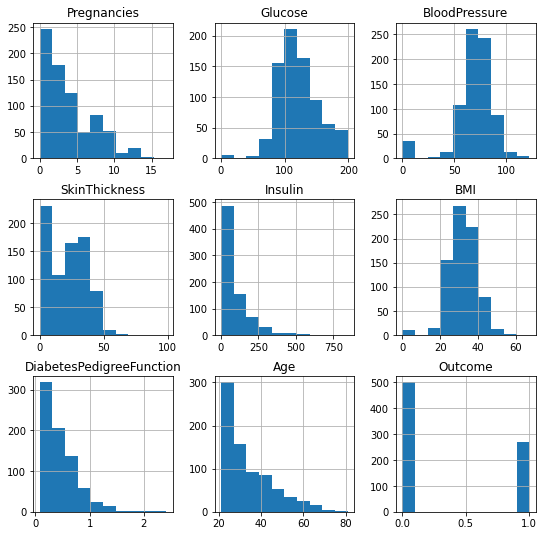

In [16]:
df_diabetes.hist(figsize=(9, 9));

### 1. Glucose: 
### Plasma glucose levels of a living person cannot be zero, but on examining the Glucose column, we can see 5 counts where the value is 0. It can be infered that these readings are corrupted. 

In [17]:
df_diabetes[df_diabetes['Glucose']==0].shape[0]

5

### 2. Blood Pressure:
### By observing the data we can see that there are 0 values for blood pressure. And it is evident that the readings of the data set seem wrong because a living person cannot have a diastolic blood pressure of zero. We can see 35 counts where the value is 0.


In [18]:
df_diabetes[df_diabetes['BloodPressure']==0].shape[0]

35

## 3. Skin Thickness:
### For normal people, skin fold thickness can’t be less than 10 mm. but on examining the Skin Thickness column, we can see 227 counts where the value is 0. It can be infered that these readings are corrupted.


In [19]:
df_diabetes[df_diabetes['SkinThickness']==0].shape[0]

227

## 4. Insulin:
### In a rare situation a person can have zero insulin but by observing the data, we can find that there is a total of 374 counts.

In [20]:
df_diabetes[df_diabetes['Insulin']==0].shape[0]

374

## 5. BMI:
### Again BMI Should not be 0 or close to zero. This could be life-threatening.


In [21]:
df_diabetes[df_diabetes['BMI']==0].shape[0]

11

In [22]:
df_diabetes_updated = df_diabetes[(df_diabetes.BloodPressure!=0) & (df_diabetes['BMI']!=0) & (df_diabetes['Glucose']!=0)]
df_diabetes_updated.shape


(724, 9)

## Q4 Please create an appropriate plot to examine the relationship between Age and Glucose.


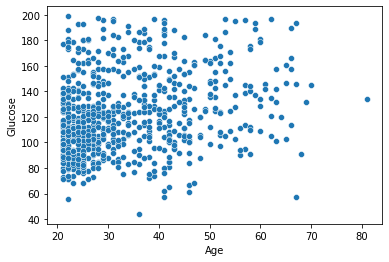

In [23]:
sns.scatterplot(data=df_diabetes_updated, x="Age", y="Glucose");

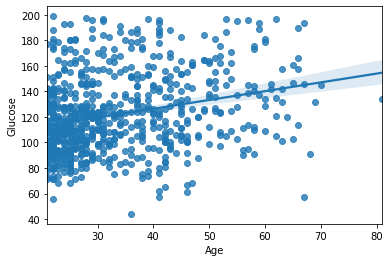

In [24]:
sns.regplot(x=df_diabetes_updated['Age'],y=df_diabetes_updated['Glucose']);

## Q5 Please create an appropriate plot to see the distribution of Outcome variable?


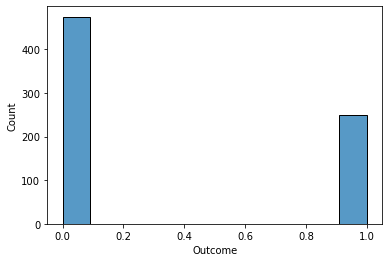

In [25]:
sns.histplot(data=df_diabetes_updated, x="Outcome");

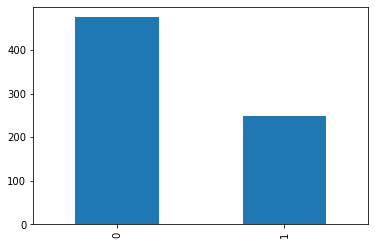

In [26]:
ax = df_diabetes_updated['Outcome'].value_counts().plot.bar()

## Q6 Please examine the distribution of numerical data and explain which variable normally distributed and which variable is seems to be skewed. Please also tell the direction of skewness.
## Q7 Please calculate the skewness value and divide variables into symmetrical, moderately skewed and highly skewed.
## Q8 Please create appropriate plot to examine the outliers of these variables. Please name the variables which have outliers.

## For Examining the Distribution of Numerical Data, we are taking updated data-set after regarding corrupted values of Glucose, BMI and BloodPressure


## After examining the distribution of Glucose, it is seen from the distribution plot that it is Right Skewed, Value of Skewness is 0.52, thus data is Moderately Skewed. further it is confirmed from the box plot, outliers are NOT present in Glucose.

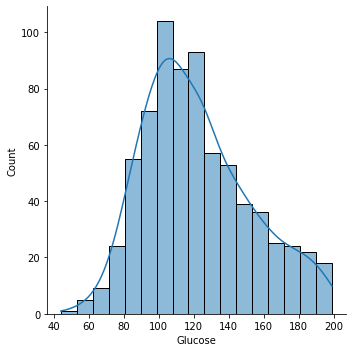

In [27]:
sns.displot(df_diabetes_updated['Glucose'], kde=True);

In [28]:
df_diabetes_updated['Glucose'].skew()

0.5271172054673043

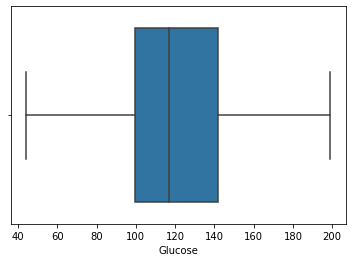

In [29]:
ax = sns.boxplot(x=df_diabetes_updated["Glucose"])

## After examining the distribution For Blood Presssure, it is seen from the distribution plot  that it is normally distributed, Value of skewness is less than 0.5, thus we can comment that the data is symmetric. further it is confirmed from the box plot, outliers are PRESENT in Blood Presssure.

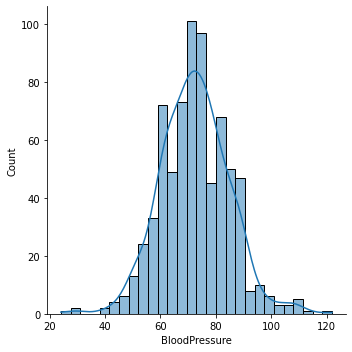

In [30]:
sns.displot(df_diabetes_updated['BloodPressure'], kde=True);

In [31]:
df_diabetes_updated['BloodPressure'].skew()

0.13762923030246277

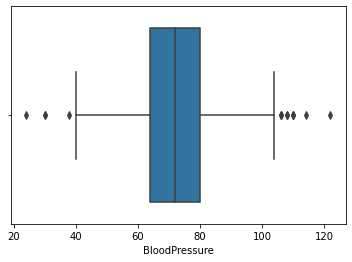

In [32]:
ax = sns.boxplot(x=df_diabetes_updated['BloodPressure'])

## After examining the distribution For Skin Thickness, it is seen from the distribution plot  that it is normally distributed, Value of skewness is less than 0.5, thus we can comment that the data is symmetric. further it is confirmed from the box plot, outliers are PRESENT in Skin Thickness.

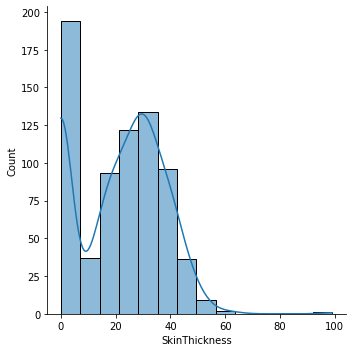

In [33]:
sns.displot(df_diabetes_updated['SkinThickness'], kde=True);

In [34]:
df_diabetes_updated['SkinThickness'].skew()

0.050349229798264616

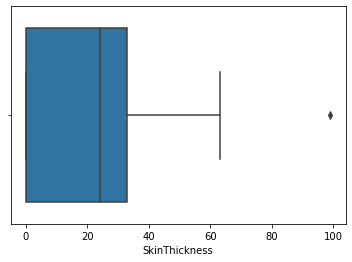

In [35]:
ax = sns.boxplot(x=df_diabetes_updated['SkinThickness'])

## After examining the distribution For Insulin, it is seen from the distribution plot  that it is Right Skewed, Value of skewness is Greater than 1, thus we can comment that the data is Highly Skewed. further it is confirmed from the box plot, outliers are PRESENT in Insulin.

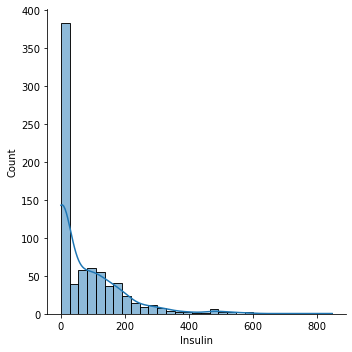

In [36]:
sns.displot(df_diabetes['Insulin'], kde=True);

In [37]:
df_diabetes_updated['Insulin'].skew()

2.200876423139384

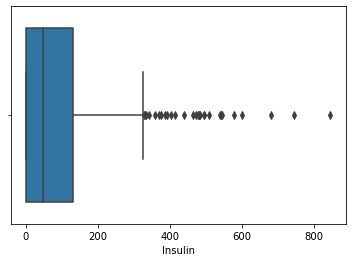

In [38]:
ax = sns.boxplot(x=df_diabetes_updated['Insulin'])

## After examining the distribution For BMI, it is seen from the distribution plot  that it is Right Skewed, Value of skewness is Greater than 0.5, thus we can comment that the data is Moderately Skewed. further it is confirmed from the box plot, outliers are PRESENT in BMI.

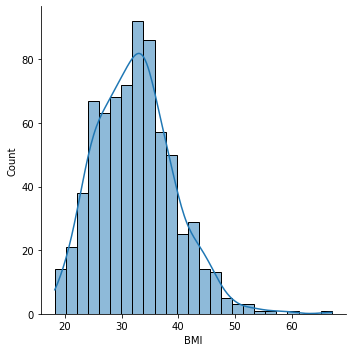

In [39]:
sns.displot(df_diabetes_updated['BMI'], kde=True);

In [40]:
df_diabetes_updated['BMI'].skew()

0.5981857900595806

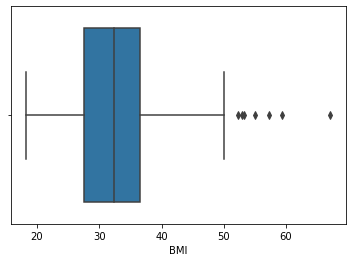

In [41]:
ax = sns.boxplot(x=df_diabetes_updated['BMI'])

## After examining the distribution For Diabetes Pedigree Function, it is seen from the distribution plot  that it is Right Skewed, Value of skewness is Greater than 1, thus we can comment that the data is Highly Skewed. further it is confirmed from the box plot, outliers are PRESENT in Diabetes Pedigree Function.


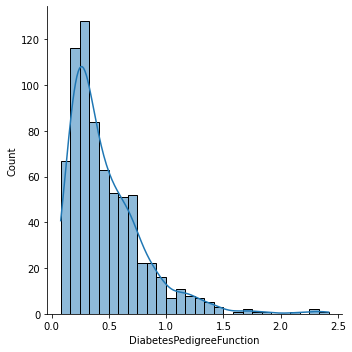

In [43]:
sns.displot(df_diabetes_updated['DiabetesPedigreeFunction'], kde=True);

In [44]:
df_diabetes_updated['DiabetesPedigreeFunction'].skew()

1.921533264166487

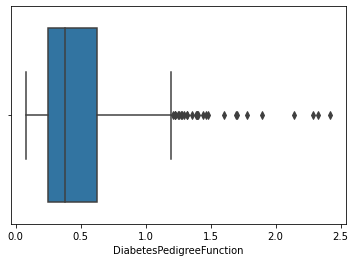

In [45]:
ax = sns.boxplot(x=df_diabetes_updated['DiabetesPedigreeFunction'])

## After examining the distribution For Age, it is seen from the distribution plot that it is Right Skewed, Value of skewness is Greater than 1, thus we can comment that the data is Highly Skewed. further it is confirmed from the box plot, outliers are PRESENT in Age.

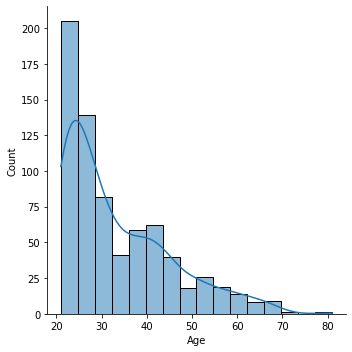

In [46]:
sns.displot(df_diabetes_updated['Age'], kde=True);

In [47]:
df_diabetes_updated['Age'].skew()

1.0885261143396305

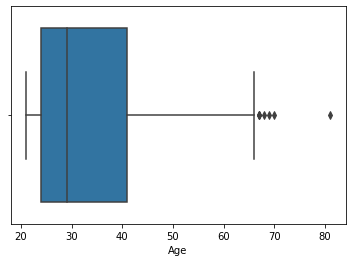

In [48]:
ax = sns.boxplot(x=df_diabetes_updated['Age'])

## Q9 What should be the measures of central tendency and dispersion for skewed data?  

### Ans: Measure of central tendency for skewed data should be MEDIAN and for measure of dispersion the interquartile range (IQR) is usually prefered for Skewed data as it is not affected by Outliers.

## Q10 Please push the assignment into your github account and provide the link of github account.

### Ans: Link to GitHub Account:  https://github.com/Nipun2212